In [1]:
import os
import glob
import importlib
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

In [2]:
import analyze2p.gratings.utils as gutils
import analyze2p.plotting as pplot
import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils as hutils

import analyze2p.decoding as dec

In [3]:
#### Plotting params
visual_areas, area_colors = pplot.set_threecolor_palette()
pplot.set_plot_params(labelsize=6, lw_axes=0.25)
bw_colors = dict((v, [0.7]*3) for v in visual_areas)

#### Main source
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
rootdir='/n/coxfs01/2p-data'
fov_type = 'zoom2p0x'
state = 'awake'

In [4]:
%matplotlib notebook

In [5]:
experiment = 'blobs'
trial_epoch = 'stimulus'
responsive_test='ROC'
# --------------------------------------------------------
response_type='dff'
traceid='traces001'
if responsive_test=='nstds':
    responsive_thr=7.0 if experiment=='rfs' else 10.
else:
    responsive_thr=0.05 if responsive_test=='ROC' else responsive_thr
resp_desc = '%s_responsive-%s-thr%.2f' \
                % (response_type, responsive_test, responsive_thr)
data_id = '|'.join([traceid, resp_desc])
print(data_id)
# ------------------------------------------------------------------
# Load all metdata and assigned cells
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
experiment_list = ['rfs10', 'rfs'] if experiment=='rfs' else [experiment]
meta = sdata[sdata.experiment.isin(experiment_list)].copy()

traces001|dff_responsive-ROC-thr0.05
/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets


In [6]:
# NDATA0 = aggr.load_responsive_neuraldata(experiment, meta=meta, 
#                                     traceid=traceid,
#                                     response_type=response_type, 
#                                     trial_epoch=trial_epoch,
#                                     responsive_test=responsive_test,
#                                     responsive_thr=responsive_thr)
# cells0 = aggr.get_all_responsive_cells(cells0, NDATA0)
# # input data
# NDATA = aggr.get_neuraldata_for_included_cells(cells0, NDATA0)

# Test stimuli

In [7]:
SD, incorrect_stim = aggr.check_sdfs(meta['datakey'].unique(), 
                         experiment=experiment, images_only=False,
                         rename=True, return_incorrect=True, 
                         return_all=True)

    renaming: 20190314_JC070_fov1
    renaming: 20190315_JC070_fov1
    renaming: 20190316_JC070_fov1
    renaming: 20190319_JC067_fov1
    renaming: 20190320_JC067_fov1
    renaming: 20190321_JC070_fov1
    renaming: 20190322_JC073_fov1
    renaming: 20190327_JC073_fov1
    renaming: 20190306_JC061_fov3


In [8]:
# all_params=['ori', 'sf', 'size', 'speed']
all_params = ['morphlevel', 'size']

sdf_master = aggr.get_master_sdf(experiment='blobs', images_only=False)

print(sdf_master[all_params].head())
print(sdf_master[all_params].tail())

          morphlevel  size
config001         -1  10.0
config002         -1  20.0
config003         -1  30.0
config004         -1  40.0
config005         -1  50.0
          morphlevel  size
config046        106  10.0
config047        106  20.0
config048        106  30.0
config049        106  40.0
config050        106  50.0


In [9]:
# dk = '20190315_JC070_fov1'
dk = '20190314_JC070_fov1'
# dk = '20190522_JC084_fov1'
sdf_o = aggr.get_stimuli(dk, experiment, match_names=False)
check_df = sdf_o[all_params].drop_duplicates()
print(check_df.head())
print(check_df.tail())

          morphlevel  size
config001          0  10.0
config003          0  20.0
config005          0  30.0
config007          0  40.0
config009          0  50.0
          morphlevel  size
config081        106  10.0
config083        106  20.0
config085        106  30.0
config087        106  40.0
config089        106  50.0


In [10]:
for ix, train_parvals in check_df.iterrows():
    train_parvals
sdf_o[sdf_o[all_params].eq(train_parvals).all(axis=1)]

,xpos,object,ypos,morphlevel,stimtype,yrot,size
config089,-15.0,Blob_N2,-5.0,106,image,0,50.0
config090,0.0,Blob_N2,0.0,106,image,0,50.0


In [16]:
merged_ = check_df.reset_index()\
                    .merge(sdf_master.reset_index(), how='left', \
                    left_on=all_params, right_on=all_params)
merged_.dropna().shape[0] == sdf_master.shape[0]
#dict((k, v) for k, v in merged_.dropna()[['index_x', 'index_y']].values)

False

In [17]:
merged_.shape, sdf_master.shape

((45, 10), (50, 8))

In [19]:
cfg_lut = dict((k, v) for k, v in merged_.dropna()[['index_x', 'index_y']].values)
print(len(cfg_lut.keys()))

45


In [20]:
cfg_lut

{'config001': 'config006',
 'config003': 'config007',
 'config005': 'config008',
 'config007': 'config009',
 'config009': 'config010',
 'config011': 'config011',
 'config013': 'config012',
 'config015': 'config013',
 'config017': 'config014',
 'config019': 'config015',
 'config021': 'config016',
 'config023': 'config017',
 'config025': 'config018',
 'config027': 'config019',
 'config029': 'config020',
 'config031': 'config021',
 'config033': 'config022',
 'config035': 'config023',
 'config037': 'config024',
 'config039': 'config025',
 'config041': 'config026',
 'config043': 'config027',
 'config045': 'config028',
 'config047': 'config029',
 'config049': 'config030',
 'config051': 'config031',
 'config053': 'config032',
 'config055': 'config033',
 'config057': 'config034',
 'config059': 'config035',
 'config061': 'config036',
 'config063': 'config037',
 'config065': 'config038',
 'config067': 'config039',
 'config069': 'config040',
 'config071': 'config041',
 'config073': 'config042',
 

In [21]:
sdf_o

,xpos,object,ypos,morphlevel,stimtype,yrot,size
config001,-15.0,Blob_N1,-5.0,0,image,0,10.0
config002,0.0,Blob_N1,0.0,0,image,0,10.0
config003,-15.0,Blob_N1,-5.0,0,image,0,20.0
config004,0.0,Blob_N1,0.0,0,image,0,20.0
config005,-15.0,Blob_N1,-5.0,0,image,0,30.0
...,...,...,...,...,...,...,...
config086,0.0,Blob_N2,0.0,106,image,0,30.0
config087,-15.0,Blob_N2,-5.0,106,image,0,40.0
config088,0.0,Blob_N2,0.0,106,image,0,40.0
config089,-15.0,Blob_N2,-5.0,106,image,0,50.0


# Example BY_NCELLS

#### Test sampling

In [9]:
n_cells_sample=4

In [8]:
cells0 = aggr.get_all_responsive_cells(cells0, NDATA0)

In [9]:
meta = sdata[sdata.experiment=='gratings'].copy()
dkey_list = meta['datakey'].unique()
SDF, incorrect = aggr.check_sdfs_gratings(dkey_list, return_incorrect=True)
SDF['config'] = SDF.index.tolist()

Checking gratings configs


In [10]:
incorrect

['20190314_JC070_fov1',
 '20190315_JC070_fov2',
 '20190319_JC067_fov1',
 '20190321_JC070_fov2',
 '20190522_JC089_fov1',
 '20190527_JC092_fov3',
 '20190512_JC083_fov1',
 '20190513_JC078_fov1',
 '20190517_JC083_fov1',
 '20190511_JC083_fov1']

<IPython.core.display.Javascript object>


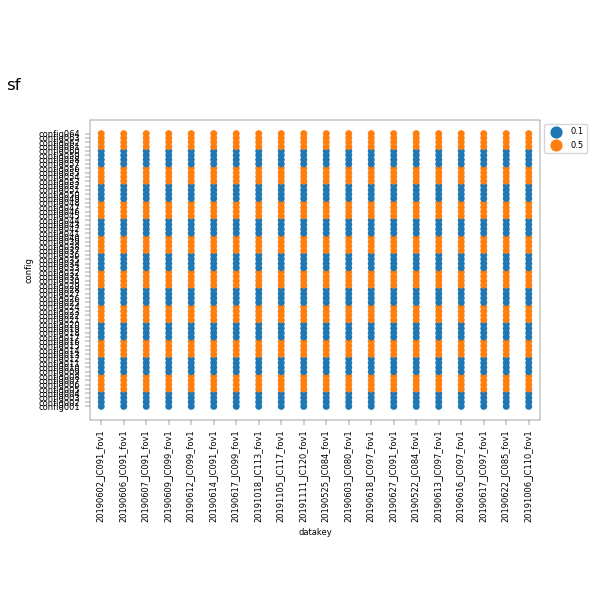

<IPython.core.display.Javascript object>


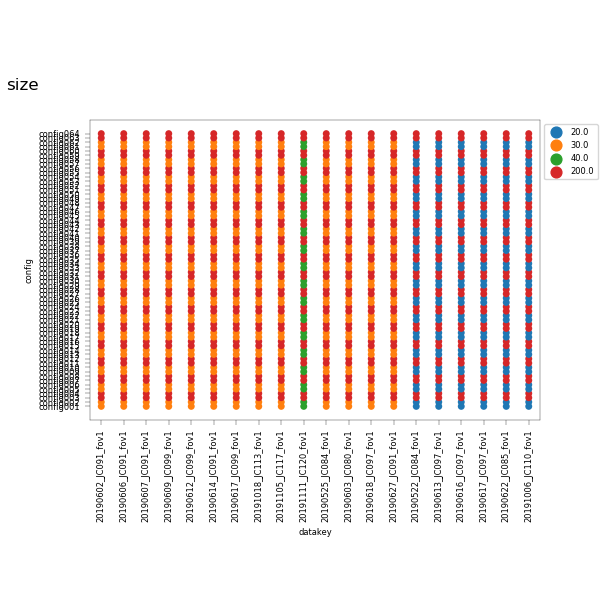

<IPython.core.display.Javascript object>


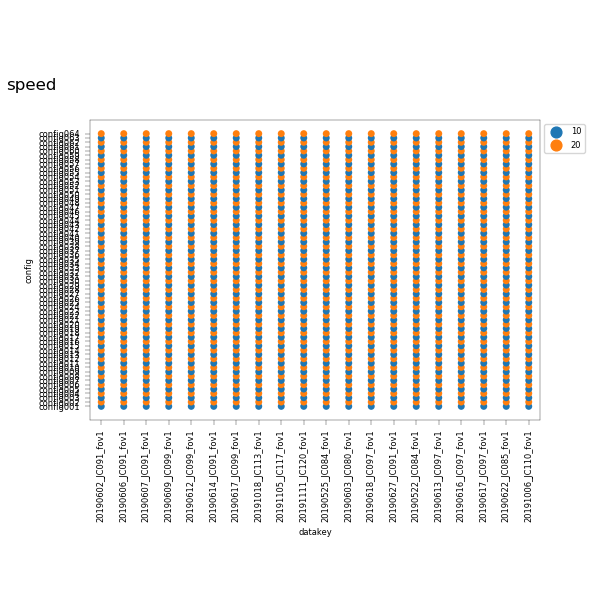

In [11]:
%matplotlib notebook
for param in ['sf', 'size', 'speed']:
    test_sd = SDF[[param, 'datakey', 'config']].drop_duplicates().copy()
    fig, ax = pl.subplots(figsize=(6,6))
    sns.stripplot(x='datakey', y='config', hue=param, data=test_sd, ax=ax, jitter=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(bbox_to_anchor=(1,1), loc='upper left')
    pl.subplots_adjust(left=0.15, right=0.9, bottom=0.3, top=0.8)
    fig.text(0.01, 0.85, param, fontsize=12)

#### rename old results_id dirs

In [194]:
import shutil

In [199]:
# Get rid of OLDDD (pre-rat2p) stuff
# for rdir in dirs_rename:
#     tracebase = rdir.split('/decoding_test')[0]
#     oldold_dir = os.path.join(tracebase, 'decoding')
#     old_dir = os.path.join(tracebase, '_decoding')
#     if os.path.exists(oldold_dir):
#         os.rename(oldold_dir, old_dir)

In [208]:
curr_test_str = 'size_subset'

experiment='blobs'
dirs_rename = glob.glob(os.path.join(rootdir, 'JC*', '2019*', 'FOV*', 
                      'combined_%s*' % experiment, 'traces/traces*',
                      'decoding_test', curr_test_str))
class_name = 'morphlevel' if experiment=='blobs' else 'ori'
print(len(dirs_rename))

43


In [209]:
for rdir in dirs_rename:
    tracebase = rdir.split('/decoding_test')[0]
    new_dir = os.path.join(tracebase, 'decoding', class_name, curr_test_str)
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    curr_fns = glob.glob(os.path.join(rdir,'*.pkl'))
    for fn in curr_fns:
        fname = os.path.split(fn)[-1]
        new_fpath = os.path.join(new_dir, fname)
        shutil.move(fn, new_fpath)


In [210]:
# Delete OLD dir
for rdir in dirs_rename:
    shutil.rmtree(rdir)

In [213]:
for rdir in dirs_rename:
    olddir = os.path.split(rdir)[0]
    shutil.rmtree(olddir)

In [217]:
fdir = os.path.join(aggregate_dir, 'decoding', 'py3_by_ncells', 'default', 'files')
fpaths = glob.glob(os.path.join(fdir, '*dff-nstds__plushalf__matchRF*.pkl'))
new_dir = os.path.join(aggregate_dir, 'decoding', 'py3_by_ncells', 'ori', 
                       'default', 'files')
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

for f in fpaths:
    fname = os.path.split(f)[-1]
    new_fpath = os.path.join(new_dir, fname)
    shutil.move(f, new_fpath)

In [84]:
print(experiment)
# dk = '20190315_JC070_fov1'
# va = 'Li'
dk = '20191006_JC110_fov1'
va = 'V1'
nmetrics = NDATA0[(NDATA0.visual_area==va) & (NDATA0.datakey==dk)].copy()
# stimuli
match_stimulus_names=experiment=='blobs'
sdf = aggr.get_stimuli(dk, experiment, match_names=match_stimulus_names)
# zscore data
ndf_z = aggr.get_zscored_from_ndf(nmetrics)
n_cells = int(ndf_z.shape[1]-1) 
print("... BY_FOV [%s] %s, n=%i cells" % (va, dk, n_cells))

gratings
... BY_FOV [V1] 20191006_JC110_fov1, n=93 cells


In [168]:
class_name = 'sf'
if class_name=='sf':
    sdf[class_name] = (sdf[class_name]*10).astype(int)
class_values = sorted((sdf[class_name].unique()))
print(class_name, class_values)

sf [1, 5]


In [169]:
varation_name = 'non_%s' % class_name
all_params=['ori', 'sf', 'size', 'speed']
nonX_params = [x for x in all_params if x!=class_name]
nonX_df = sdf[nonX_params].drop_duplicates()

In [170]:
variation_name = 'non_%s' % class_name
variation_values=None
#sdf[variation_name]=None
sdf.loc[sdf.index, variation_name] = ['%.1f_%.1f_%.1f' % (v1, v2, v3) for v1, v2, v3
                                         in sdf[nonX_params].values]
sdf.head()

,direction,luminance,stimtype,xpos,ypos,aspect,ori,position,speed,sf,size,non_sf
config001,0,None,gratings,30.0,0.0,1,0,"(30, 0)",10,1,20.0,0.0_20.0_10.0
config002,0,None,gratings,30.0,0.0,1,0,"(30, 0)",20,1,20.0,0.0_20.0_20.0
config003,0,None,gratings,30.0,0.0,1,0,"(30, 0)",10,1,200.0,0.0_200.0_10.0
config004,0,None,gratings,30.0,0.0,1,0,"(30, 0)",20,1,200.0,0.0_200.0_20.0
config005,0,None,gratings,30.0,0.0,1,0,"(30, 0)",10,5,20.0,0.0_20.0_10.0


In [171]:
for ix, train_parvals in nonX_df.iterrows():
    train_parvals

In [172]:
# pd.merge(nonori_df.iloc[0], sdf, how='left', l
#          eft_on=nonori_params, right_on=nonori_params)
sdf[sdf[nonX_params].eq(train_parvals).all(axis=1)]

,direction,luminance,stimtype,xpos,ypos,aspect,ori,position,speed,sf,size,non_sf
config060,0,None,gratings,30.0,0.0,1,315,"(30, 0)",20,1,200.0,315.0_200.0_20.0
config064,0,None,gratings,30.0,0.0,1,315,"(30, 0)",20,5,200.0,315.0_200.0_20.0


In [173]:
C_value=1.0
test_split=0.2
cv_nfolds=5
n_iterations = 1
n_processes=1

in_args={'class_name': class_name,
            'class_values': class_values,
            'variation_name': variation_name,
            'variation_values': variation_values,
            'n_train_configs': None,
            'C_value': C_value,
            'cv_nfolds': cv_nfolds,
            'test_split': test_split,
            'balance_configs':True,
            'do_shuffle': True,
            }
            #'return_clf': False,
            #'verbose': False}

In [174]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [175]:
ndf_z.head()

cell,0,5,7,18,19,23,28,29,31,32,...,269,281,288,301,302,312,313,320,328,config
trial,,,,,,,,,,,,,,,,,,,,,
1,0.198689,3.372258,1.310275,1.669478,1.158809,2.800322,6.023257,2.217898,0.504524,9.150741,...,-0.369457,7.231100,2.860498,1.949620,1.949697,-0.246776,2.542552,2.919298,2.170832,config026
2,-1.362432,1.723504,-1.045571,-1.394124,-0.989003,-1.069636,-3.090945,0.945653,0.545892,2.909722,...,1.135723,2.547383,0.642592,-1.309637,-0.203067,2.864497,0.110992,1.441736,-0.465756,config010
3,0.386804,-0.476859,1.586870,0.061612,-0.146710,0.491951,-0.082925,-0.442365,-0.657308,-2.497822,...,-1.276496,-0.337232,-2.111805,-1.823482,0.097954,-0.630645,-1.190312,-0.976449,-0.591894,config064
4,0.059929,2.814610,1.285745,0.845159,2.511355,2.534427,2.066325,2.390148,2.591599,1.591087,...,0.578508,3.064076,-1.760332,2.517116,2.379207,1.636816,1.598476,-0.508890,0.164988,config049
5,0.008623,0.641584,-0.977096,-0.310822,-0.014717,0.959728,1.442825,0.163926,-0.182029,-0.957050,...,0.088890,-0.915419,0.197938,-0.502631,0.009305,-1.633086,0.371755,-0.589681,-1.799340,config016


In [176]:
nmetrics

,datakey,config,trial,visual_area,cell,response,experiment
0,20191006_JC110_fov1,config026,1,V1,0,0.022230,gratings
1,20191006_JC110_fov1,config010,2,V1,0,-0.106479,gratings
2,20191006_JC110_fov1,config064,3,V1,0,0.037739,gratings
3,20191006_JC110_fov1,config049,4,V1,0,0.010790,gratings
4,20191006_JC110_fov1,config016,5,V1,0,0.006560,gratings
...,...,...,...,...,...,...,...
119035,20191006_JC110_fov1,config036,1276,V1,328,0.020701,gratings
119036,20191006_JC110_fov1,config020,1277,V1,328,-0.000334,gratings
119037,20191006_JC110_fov1,config046,1278,V1,328,-0.011393,gratings
119038,20191006_JC110_fov1,config050,1279,V1,328,-0.012264,gratings


In [177]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [178]:
train_configs = sdf[sdf[class_name].isin(class_values)].index.tolist()
sample_data = curr_data[curr_data['config'].isin(train_configs)]
sample_data = aggr.equal_counts_df(sample_data)
zdata = sample_data.drop('config', 1)
targets = pd.DataFrame(sample_data['config'].copy(), columns=['config'])
targets['label'] = [sdf[class_name][cfg] for cfg in targets['config'].values]
targets['label'].unique()

array([1, 5])

In [181]:
clf_params = {'C_value': C_value,
              'cv_nfolds': cv_nfolds,
              'test_split': test_split,
              'randi': 100,
              'inum': iter_num}

In [182]:
iter_num=2
# curr_data = ndf_z.copy()
#res = dec.decode_from_fov(dk, experiment, nmetrics, sdf, verbose=True, **in_args)
#res = dec.select_test(iter_num, None, ndf_z, sdf, False, verbose=True, **in_args)
res = dec.do_fit_within_fov(iter_num, ndf_z, sdf, verbose=True, **in_args)
#idf_ = dec.fit_svm(zdata, targets, **clf_params)
res

Unique train: [1 5] (1024)
... train (C=1.00): 0.92, test: 0.85
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           1       0.85      0.85      0.85       128
           5       0.85      0.85      0.85       128

    accuracy                           0.85       256
   macro avg       0.85      0.85      0.85       256
weighted avg       0.85      0.85      0.85       256

Unique train: [1 5] (1024)
... train (C=1.00): 0.65, test: 0.47
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           1       0.49      0.51      0.50       128
           5       0.49      0.48      0.48       128

    accuracy                           0.49       256
   macro avg       0.49      0.49      0.49       256
weigh

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,n_cells,n_trials,iteration
2,0.147973,0.002486,0.845681,0.915283,0.851562,1.0,1178,data,93,1280,2
2,0.335128,0.006359,0.467795,0.645021,0.492188,1.0,1178,shuffled,93,1280,2


In [102]:
for ix, train_parvals in nonX_df.iterrows():
    curr_sdf = sdf[sdf[nonX_params].eq(train_parvals).all(axis=1)].copy()
    train_configs = curr_sdf[curr_sdf[class_name].isin(class_values)].index.tolist()
    print(len(train_configs))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


# With RFs

In [127]:
import analyze2p.receptive_fields.utils as rfutils

In [228]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [229]:
rf_lim = 'percentile'
# cells_lim = dec.get_cells_with_matched_rfs(cells0, sdata, rf_lim='percentile')
rfdf = dec.get_rfdf(cells0, sdata, do_spherical_correction=False)
cells_RF = dec.get_cells_with_rfs(cells0, rfdf)
cells_lim, sz_limits = dec.limit_cells_by_rf(cells_RF, rf_lim=rf_lim)

N dpaths: 62, N unfit: 0
N datasets included: 67, N sessions excluded: 4


In [230]:
print(cells_RF[['visual_area', 'datakey', 'cell']].drop_duplicates()\
      ['visual_area'].value_counts().to_markdown())

|    |   visual_area |
|:---|--------------:|
| V1 |          1119 |
| Li |           597 |
| Lm |           446 |


In [231]:
sz_lower, sz_upper = sz_limits.loc['lower'].max(), sz_limits.loc['upper'].min()
sz_limits

,Li,Lm,V1
lower,13.869418,1.958139,7.328274
upper,53.887003,51.883686,39.171562


In [232]:
dst_dir = os.path.join(aggregate_dir, 'decoding', 'py3_controls')
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
    print(dst_dir)

<IPython.core.display.Javascript object>


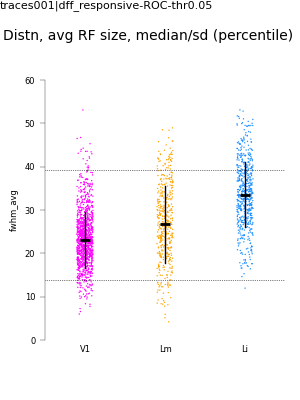

In [251]:
%matplotlib notebook
fig, ax = pl.subplots(figsize=(3,4))
sns.stripplot(x='visual_area', y='fwhm_avg', hue='visual_area', 
             data=cells_RF, ax=ax, order=visual_areas, 
             palette=area_colors, s=1, zorder=0)
sns.pointplot(x='visual_area', y='fwhm_avg',
             data=cells_RF, ax=ax, order=visual_areas, join=False, ci='sd',
             estimator=np.median, color='k', markers='_', scale=1, zorder=1000,
             errwidth=1)
ax.set_ylim([0, 60])
ax.set_xlabel('')
ax.tick_params(which='both', axis='x', size=0)
# sz_upper_lim=16.6
# sz_lower_lim=6.9
ax.axhline(y=sz_lower, color='k', ls=':', lw=0.5)
ax.axhline(y=sz_upper, color='k', ls=':', lw=0.5)
ax.legend_.remove()
sns.despine(bottom=True, trim=True)
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.8)

fig.text(0.01, 0.9, 'Distn, avg RF size, median/sd (%s)' % rf_lim)
pplot.label_figure(fig, data_id)
pl.savefig(os.path.join(dst_dir, 'RF_sizes_%s.svg' % rf_lim))

In [234]:
do_spherical_correction=False
response_type='dff'
cells_match = dec.get_cells_with_matched_rfs(cells0, sdata, rf_lim=rf_lim,
                                    response_type=response_type,
                                    do_spherical_correction=do_spherical_correction)


N dpaths: 62, N unfit: 0
N datasets included: 67, N sessions excluded: 4


In [235]:
NDATA = pd.concat([NDATA0[(NDATA0.visual_area==va) & (NDATA0.datakey==dk)\
                        & (NDATA0['cell'].isin(g['cell'].unique()))]\
                for (va, dk), g in cells_match.groupby(['visual_area', 'datakey'])])

In [236]:
counts = NDATA[['visual_area', 'datakey', 'cell']].drop_duplicates()\
            .groupby(['visual_area', 'datakey'])['cell'].count().reset_index()\
            .rename(columns={'cell': 'n_included'})
counts1 = NDATA0[['visual_area', 'datakey', 'cell']].drop_duplicates()\
            .groupby(['visual_area', 'datakey'])['cell'].count().reset_index()\
            .rename(columns={'cell': 'n_responsive'})

In [237]:
print(counts.shape, counts1.shape)
total_counts = pd.merge(counts, counts1)

(38, 3) (53, 3)


In [238]:
total_counts['fraction_included'] = total_counts['n_included']/total_counts['n_responsive']
total_counts.head()

,visual_area,datakey,n_included,n_responsive,fraction_included
0,Li,20190602_JC091_fov1,40,87,0.459770
1,Li,20190606_JC091_fov1,11,48,0.229167
2,Li,20190607_JC091_fov1,17,52,0.326923
3,Li,20190609_JC099_fov1,22,57,0.385965
4,Li,20190612_JC099_fov1,13,38,0.342105


<IPython.core.display.Javascript object>


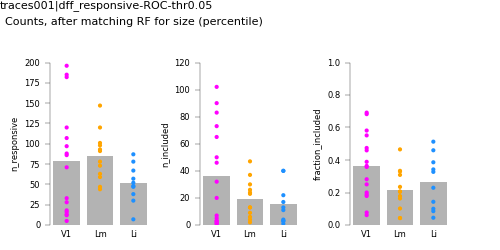

In [241]:
fig, axn = pl.subplots(1,3, figsize=(5,2.5), )
for ax, metric in zip(axn.flat, ['n_responsive', 'n_included', 'fraction_included']):
    sns.barplot(x='visual_area', y=metric, data=total_counts, ax=ax,
               color=[0.7]*3, order=visual_areas, ci=None)
    sns.stripplot(x='visual_area', y=metric, data=total_counts, ax=ax,
               hue='visual_area', order=visual_areas, palette=area_colors, size=3,
               jitter=False)
    if metric=='n_responsive':
        ax.set_ylim([0, 200])
    elif metric=='n_included':
        ax.set_ylim([0, 120])
    else:
        ax.set_ylim([0, 1])
    ax.set_xlabel('')
    ax.tick_params(which='both', axis='x', size=0)
    ax.legend_.remove()
sns.despine(bottom=True, trim=False)
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.75, wspace=0.5)

fig.text(0.01, 0.9, 'Counts, after matching RF for size (%s)' % rf_lim, fontsize=8)

pplot.label_figure(fig, data_id)

pl.savefig(os.path.join(dst_dir, 'counts_after_match_rfs.svg'))

In [205]:
total_counts['fraction_included'].min()

0.0425531914893617